# ANALISE DE DADOS DO ENEM 2018

In [1]:
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv
import numpy as np

In [2]:
colunas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'IN_GESTANTE',
           'NU_IDADE', 'TP_SEXO', 'CO_MUNICIPIO_RESIDENCIA', 
           'CO_UF_PROVA', 'SG_UF_PROVA', 
           'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
           'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [3]:
dados = pandas.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=colunas)

In [4]:
dados.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,5300108,DF,44.0,M,0,52,GO,NaN,NaN,NaN,NaN,NaN,A,A
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B
2,180008517434,3530607,SP,23.0,F,0,43,RS,NaN,NaN,NaN,NaN,NaN,E,E
3,180007661228,2916401,BA,26.0,F,0,29,BA,NaN,NaN,NaN,NaN,NaN,B,C
4,180008787987,2918100,BA,20.0,M,0,29,BA,NaN,419.9,345.8,NaN,360.0,C,E


In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'IN_GESTANTE', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002'], dtype=object)

In [6]:
colunasSelecionadasEnen = ['NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
       'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS',
       'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE',
       'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
       'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO',
       'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
       'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA',
       'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL',
       'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO',
       'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

In [7]:
dadosSelecionado = dados.filter(items=colunasSelecionadasEnen)

In [8]:
dadosSelecionado.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,DF,44.0,M,0,52,GO,NaN,NaN,NaN,NaN,NaN,A,A
1,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B
2,SP,23.0,F,0,43,RS,NaN,NaN,NaN,NaN,NaN,E,E
3,BA,26.0,F,0,29,BA,NaN,NaN,NaN,NaN,NaN,B,C
4,BA,20.0,M,0,29,BA,NaN,419.9,345.8,NaN,360.0,C,E


In [9]:
dados[0:20]

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,180008202043,5300108,DF,44.0,M,0,52,GO,NaN,NaN,NaN,NaN,NaN,A,A
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B
2,180008517434,3530607,SP,23.0,F,0,43,RS,NaN,NaN,NaN,NaN,NaN,E,E
3,180007661228,2916401,BA,26.0,F,0,29,BA,NaN,NaN,NaN,NaN,NaN,B,C
4,180008787987,2918100,BA,20.0,M,0,29,BA,NaN,419.9,345.8,NaN,360.0,C,E
5,180007239581,2507507,PB,23.0,F,0,25,PB,461.8,564.0,466.8,538.8,580.0,C,D
6,180007198225,3171709,MG,35.0,F,0,31,MG,NaN,NaN,NaN,NaN,NaN,B,B
7,180008090447,2207702,PI,39.0,M,0,22,PI,499.3,663.2,605.2,733.8,680.0,A,E
8,180008257068,2304400,CE,19.0,M,0,23,CE,411.8,429.8,445.2,459.0,340.0,D,D
9,180008202044,5103403,MT,25.0,F,0,51,MT,469.4,650.2,606.6,525.4,740.0,C,C


In [10]:
coluna_tp_sexo = dadosSelecionado ['TP_SEXO']

In [11]:
coluna_tp_sexo

0          M
1          F
2          F
3          F
4          M
          ..
5513742    F
5513743    F
5513744    F
5513745    F
5513746    M
Name: TP_SEXO, Length: 5513747, dtype: object

In [12]:
coluna_tp_sexo.value_counts().sort_index()

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

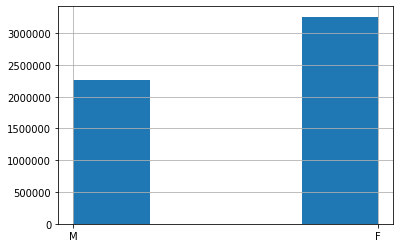

In [13]:
coluna_tp_sexo.hist(bins=4)

In [14]:
coluna_nu_idade = dadosSelecionado ['NU_IDADE']

In [15]:
coluna_nu_idade

0          44.0
1          23.0
2          23.0
3          26.0
4          20.0
           ... 
5513742    56.0
5513743    20.0
5513744    17.0
5513745    17.0
5513746    21.0
Name: NU_IDADE, Length: 5513747, dtype: float64

In [16]:
coluna_nu_idade.head()

0    44.0
1    23.0
2    23.0
3    26.0
4    20.0
Name: NU_IDADE, dtype: float64

In [17]:
coluna_nu_idade.value_counts().sort_index()

10.0       6
11.0      11
12.0      40
13.0     272
14.0    5625
        ... 
87.0       2
88.0       1
89.0       1
90.0       1
98.0       1
Name: NU_IDADE, Length: 82, dtype: int64

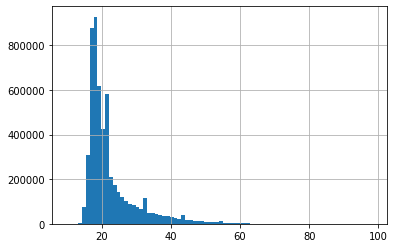

In [18]:
coluna_nu_idade.hist(bins=80)

In [19]:
coluna_sg_uf_residencia = dadosSelecionado ['SG_UF_RESIDENCIA']

In [20]:
coluna_sg_uf_residencia

0          DF
1          MA
2          SP
3          BA
4          BA
           ..
5513742    RJ
5513743    AM
5513744    SP
5513745    SP
5513746    MG
Name: SG_UF_RESIDENCIA, Length: 5513747, dtype: object

In [21]:
coluna_sg_uf_residencia.value_counts()

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

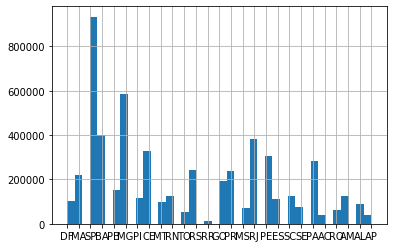

In [22]:
coluna_sg_uf_residencia.hist(bins=40)

In [23]:
coluna_in_gestante = dadosSelecionado ['IN_GESTANTE']

In [24]:
coluna_in_gestante.value_counts()

0    5511967
1       1780
Name: IN_GESTANTE, dtype: int64

In [25]:
distInGestante = coluna_in_gestante.value_counts()

In [26]:
porcentInGestante = [100*x/distInGestante.sum() for x in distInGestante]

In [27]:
porcentInGestante

[99.967717053394, 0.032282946606001325]

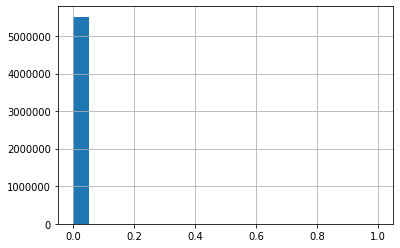

In [28]:
coluna_in_gestante.hist(bins=20)

In [29]:
coluna_tp_sexo = dadosSelecionado ['TP_SEXO']

In [30]:
distTpSexo = coluna_tp_sexo.value_counts()

In [31]:
distTpSexo

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [32]:
porcenTpSexo = [100*x/distTpSexo.sum() for x in distTpSexo]

In [33]:
porcenTpSexo

[59.08328764450019, 40.91671235549981]

In [34]:
sexoFeminino = distTpSexo[0]

In [35]:
nu_gestante = distInGestante[1]

In [36]:
sexoFeminino

3257703

In [37]:
nu_gestante

1780

In [38]:
porcentGestante = [100*nu_gestante/sexoFeminino]

In [39]:
porcentGestante

[0.054639726211996614]

In [40]:
dadosSelecionado = ['TP_SEXO', 'NU_NOTA_MT']

In [41]:
dadosSexoRedacao = dados.filter(items=dadosSelecionado)

In [42]:
dadosSexoRedacao.head()

,TP_SEXO,NU_NOTA_MT
0,M,NaN
1,F,480.3
2,F,NaN
3,F,NaN
4,M,NaN


In [43]:
dadosSexoRedacao = dadosSexoRedacao.dropna()

In [44]:
dadosSexoRedacao.head()

,TP_SEXO,NU_NOTA_MT
1,F,480.3
5,F,538.8
7,M,733.8
8,M,459.0
9,F,525.4


In [45]:
dadosSexoRedacao.groupby('TP_SEXO').count()

,NU_NOTA_MT
TP_SEXO,
F,2307351
M,1597748


In [46]:
dadosSexoRedacao.groupby('TP_SEXO').max()

,NU_NOTA_MT
TP_SEXO,
F,996.1
M,996.1


In [47]:
dadosSexoRedacao.groupby('TP_SEXO').min()

,NU_NOTA_MT
TP_SEXO,
F,0.0
M,0.0


In [48]:
dadosSelecionado = ['TP_SEXO', 'NU_NOTA_MT']

In [49]:
dadosSexoRedacao[dadosSexoRedacao.NU_NOTA_MT >0].groupby('TP_SEXO').min()

,NU_NOTA_MT
TP_SEXO,
F,360.0
M,360.3


In [50]:
dadosSexoRedacao.groupby('TP_SEXO').mean()

,NU_NOTA_MT
TP_SEXO,
F,518.279202
M,560.138211


In [51]:
dadosSexoRedacao.groupby('TP_SEXO').median()

,NU_NOTA_MT
TP_SEXO,
F,500.7
M,543.9


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

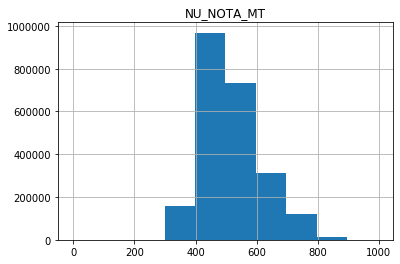

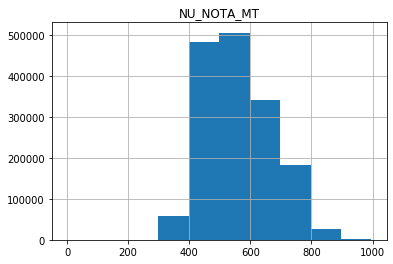

In [52]:
dadosSexoRedacao.groupby('TP_SEXO').hist()

In [53]:
dadosSexoRedacao.groupby('TP_SEXO').describe()

NU_NOTA_MT                                                         
             count        mean         std  min    25%    50%    75%    max
TP_SEXO                                                                    
F        2307351.0  518.279202   95.361530  0.0  445.6  500.7  573.0  996.1
M        1597748.0  560.138211  108.802748  0.0  474.0  543.9  640.3  996.1

In [54]:
dadosSelecionado = ['TP_SEXO', 'NU_NOTA_CH']

In [55]:
dadosSexoCienHum = dados.filter(items=dadosSelecionado)

In [56]:
dadosSexoCienHum = dadosSexoCienHum.dropna()

In [57]:
dadosSexoCienHum.head()

,TP_SEXO,NU_NOTA_CH
1,F,568.7
4,M,419.9
5,F,564.0
7,M,663.2
8,M,429.8


In [58]:
dadosSexoCienHum.groupby('TP_SEXO').count()

,NU_NOTA_CH
TP_SEXO,
F,2454691
M,1693573


In [59]:
dadosSexoCienHum.groupby('TP_SEXO').max()

,NU_NOTA_CH
TP_SEXO,
F,850.4
M,850.4


In [60]:
dadosSexoCienHum.groupby('TP_SEXO').min()

,NU_NOTA_CH
TP_SEXO,
F,0.0
M,0.0


In [61]:
dadosSexoCienHum.groupby('TP_SEXO').mean()

,NU_NOTA_CH
TP_SEXO,
F,563.987985
M,574.054469


In [62]:
dadosSexoCienHum.groupby('TP_SEXO').median()

,NU_NOTA_CH
TP_SEXO,
F,576.0
M,592.1


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

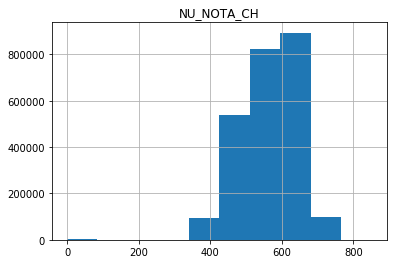

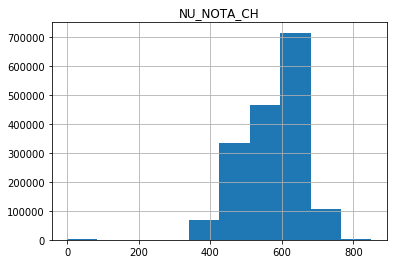

In [63]:
dadosSexoCienHum.groupby('TP_SEXO').hist()

In [64]:
dadosSexoCienHum.groupby('TP_SEXO').describe()

NU_NOTA_CH                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        2454691.0  563.987985  79.165478  0.0  507.3  576.0  622.4  850.4
M        1693573.0  574.054469  84.225843  0.0  514.0  592.1  636.0  850.4

# QUESTIONARIO SOCIO ECONOMICO ENEM 2018

In [65]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv
import numpy as np

In [66]:
colunas = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'IN_GESTANTE',
           'NU_IDADE', 'TP_SEXO', 'CO_MUNICIPIO_RESIDENCIA', 
           'CO_UF_PROVA', 'SG_UF_PROVA', 
           'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
           'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [67]:
socEcon = pandas.read_csv('MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=colunas)

In [68]:
socEcon.columns.values

array(['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'IN_GESTANTE', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002'], dtype=object)

In [69]:
socEconSelecionado = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'IN_GESTANTE', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [70]:
socEconSelecionado = socEcon.filter(items=socEconSelecionado)

In [71]:
socEconSelecionado = socEconSelecionado.dropna()

In [72]:
socEconSelecionado.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B
5,180007239581,2507507,PB,23.0,F,0,25,PB,461.8,564.0,466.8,538.8,580.0,C,D
7,180008090447,2207702,PI,39.0,M,0,22,PI,499.3,663.2,605.2,733.8,680.0,A,E
8,180008257068,2304400,CE,19.0,M,0,23,CE,411.8,429.8,445.2,459.0,340.0,D,D
9,180008202044,5103403,MT,25.0,F,0,51,MT,469.4,650.2,606.6,525.4,740.0,C,C


# Finalmente: o questionário de indicadores socioeconômicos!
Começaremos pelas duas primeiras questões:

Q001 Até que série seu pai, ou o homem responsável por você, estudou?

Q002 Até que série sua mãe, ou a mulher responsável por você, estudou?

# Passo 1 - Definindo um dicionário:
Faremos isso para visualizar melhor o resultado

In [73]:
q001e002Dicionario = {
'A': 'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [74]:
socEconSelecionado.filter(items=['Q001','NU_INSCRICAO'])\
                                .groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,200900
B,813665
C,549957
D,460444
E,1043454
F,311907
G,187699
H,325645


# Passo 2 - Criar novas colunas no DataFrame
Inserido coluna NO_Q001:

In [75]:
socEconSelecionado['NO_Q001'] = [q001e002Dicionario[resp] for resp in socEconSelecionado.Q001]

In [76]:
socEconSelecionado.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,2507507,PB,23.0,F,0,25,PB,461.8,564.0,466.8,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou..."
7,180008090447,2207702,PI,39.0,M,0,22,PI,499.3,663.2,605.2,733.8,680.0,A,E,Nunca estudou
8,180008257068,2304400,CE,19.0,M,0,23,CE,411.8,429.8,445.2,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,5103403,MT,25.0,F,0,51,MT,469.4,650.2,606.6,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou..."


Inserido coluna NO_Q002:

In [77]:
socEconSelecionado.filter(items=['Q002','NU_INSCRICAO'])\
                                .groupby('Q002').count()

,NU_INSCRICAO
Q002,
A,136414
B,606697
C,515976
D,509533
E,1275050
F,417214
G,322686
H,110101


In [78]:
socEconSelecionado['NO_Q002'] = [q001e002Dicionario[resp] for resp in socEconSelecionado.Q002]

Olhando o head do DataFrame para verificar a inserção:

In [79]:
socEconSelecionado.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,2507507,PB,23.0,F,0,25,PB,461.8,564.0,466.8,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,2207702,PI,39.0,M,0,22,PI,499.3,663.2,605.2,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,2304400,CE,19.0,M,0,23,CE,411.8,429.8,445.2,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,5103403,MT,25.0,F,0,51,MT,469.4,650.2,606.6,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


# Passo 3 - Comparando distribução do nível de escolaridade Pai x Mãe no conjunto de dados
Utilizando os métodos do DataFrame filter(), groupby(), count(), sort_values()


1 - distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [80]:
socEconSelecionado.filter(items=['NU_INSCRICAO','NO_Q001'])\
                                .groupby('NO_Q001').count()

,NU_INSCRICAO
NO_Q001,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",549957
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",460444
"Completou a Faculdade, mas não completou a Pós-graduação",311907
Completou a Pós-graduação,187699
"Completou o Ensino Médio, mas não completou a Faculdade",1043454
Nunca estudou,200900
Não completou a 4ª série/5º ano do Ensino Fundamental,813665
Não sei,325645


Distribuição dos candidatos do Enem 2018 por escolaridade da Mãe

In [81]:
socEconSelecionado.filter(items=['NU_INSCRICAO','NO_Q002'])\
                     .groupby('NO_Q002')\
                     .count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1275050
Não completou a 4ª série/5º ano do Ensino Fundamental,606697
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515976
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",509533
"Completou a Faculdade, mas não completou a Pós-graduação",417214
Completou a Pós-graduação,322686
Nunca estudou,136414
Não sei,110101


# Passo 4 - Desempenho em matemática segundo a escolaridade Pai/Mâe

Escolaridade do Pai

In [82]:
socEconSelecionado.filter(items=['NU_NOTA_MT','NO_Q001'])\
                        .groupby('NO_Q001')\
                        .mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,628.855790
"Completou a Faculdade, mas não completou a Pós-graduação",606.909924
"Completou o Ensino Médio, mas não completou a Faculdade",550.922365
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",530.540936
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",519.451014
Não sei,512.677282
Não completou a 4ª série/5º ano do Ensino Fundamental,502.412736
Nunca estudou,483.411849


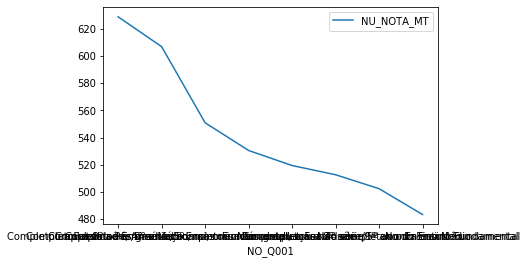

In [83]:
socEconSelecionado.filter(items=['NU_NOTA_MT','NO_Q001'])\
                        .groupby('NO_Q001')\
                        .mean().sort_values(by='NU_NOTA_MT', ascending=False).plot()

Ecolaridade da Mãe

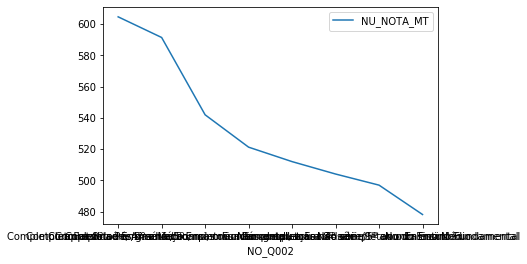

In [84]:
socEconSelecionado.filter(items=['NU_NOTA_MT','NO_Q002'])\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_MT', ascending=False).plot()

# Passo 5 - Olhando o desempenho em redação segundo a escolaridade Pai e Mãe

1 - por Escolaridade do Pai

In [85]:
socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001'])\
.groupby('NO_Q001')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,652.211892
"Completou a Faculdade, mas não completou a Pós-graduação",622.429122
"Completou o Ensino Médio, mas não completou a Faculdade",544.272100
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",511.712608
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",492.836676
Não sei,474.282117
Não completou a 4ª série/5º ano do Ensino Fundamental,464.490251
Nunca estudou,427.263614


Olhando para essa informação em um gráfico:

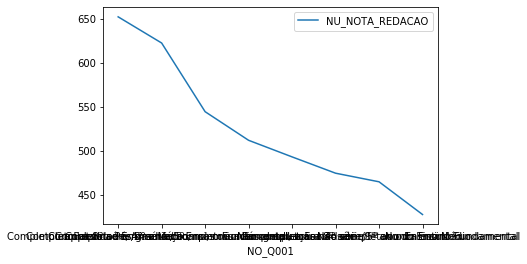

In [86]:
socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001'])\
            .groupby('NO_Q001')\
            .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).plot()

Por Escolaridade da Mãe

In [87]:
socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
.groupby('NO_Q002')\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,622.781590
"Completou a Faculdade, mas não completou a Pós-graduação",601.239076
"Completou o Ensino Médio, mas não completou a Faculdade",530.016470
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",495.963206
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.676070
Não completou a 4ª série/5º ano do Ensino Fundamental,454.592062
Não sei,447.200843
Nunca estudou,414.232410


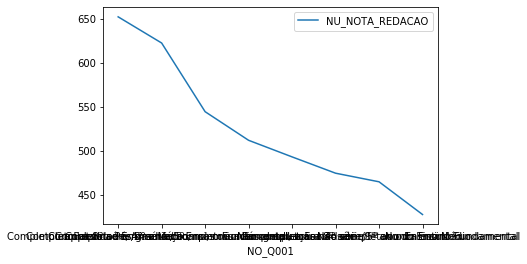

In [88]:
socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001'])\
            .groupby('NO_Q001')\
            .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).plot()

In [89]:
q002Redacao = socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
.groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [90]:
q002Redacao

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,622.781590
"Completou a Faculdade, mas não completou a Pós-graduação",601.239076
"Completou o Ensino Médio, mas não completou a Faculdade",530.016470
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",495.963206
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",479.676070
Não completou a 4ª série/5º ano do Ensino Fundamental,454.592062
Não sei,447.200843
Nunca estudou,414.232410


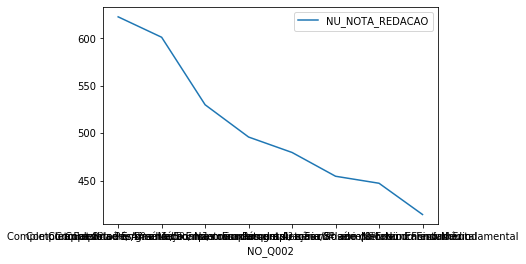

In [91]:
q002Redacao.plot()

In [92]:
socEconSelecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001'])\
                        .groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        549957.0   
Completou a 8ª série/9º ano do Ensino Fundament...        460444.0   
Completou a Faculdade, mas não completou a Pós-...        311907.0   
Completou a Pós-graduação                                 187699.0   
Completou o Ensino Médio, mas não completou a F...       1043454.0   
Nunca estudou                                             200900.0   
Não completou a 4ª série/5º ano do Ensino Funda...        813665.0   
Não sei                                                   325645.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  492.836676  173.585828   
Completou a 8ª série/9º ano do Ensino Fundament...  511.712608  176.643305   
Completou a Faculdade, mas não completou a Pós-...  622.429122  183.709089   
Completou a Pós-graduação                           652.211892  183.977751   
Completou o Ensino Médio, mas não completou a F...  544.272100  180.804612   
Nunca estudou                                       427.263614  166.189247   
Não completou a 4ª série/5º ano do Ensino Funda...  464.490251  165.704736   
Não sei                                             474.282117  175.884980   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  360.0  500.0  600.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  360.0  520.0  620.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  520.0  620.0  760.0   
Completou a Pós-graduação                           0.0  540.0  660.0  800.0   
Completou o Ensino Médio, mas não completou a F...  0.0  400.0  560.0  660.0   
Nunca estudou                                       0.0  320.0  400.0  540.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  340.0  460.0  580.0   
Não sei                                             0.0  340.0  480.0  580.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...  1000.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                       1000.0  
Não completou a 4ª série/5º ano do Ensino Funda...  1000.0  
Não sei                                              980.0

# Principal resultado obtido

A média das notas me matemática e nas notas da redação obedecem uma tendência de crescimento que acompanha o crescimento das escolaridade dos pais e das mães, ou seja, responsáveis mais escolarizados influenciam no aumento da nota dos alunos.

# A tendência se repete se olharmos por Estado

Selecionar colunas de interesse:

In [93]:
colunasSelecionado = ['NU_INSCRICAO', 'SG_UF_RESIDENCIA',
                       'NU_NOTA_MT','NU_NOTA_REDACAO', 
                       'Q001', 'Q002']

In [94]:
socEconSelecionado['SG_UF_RESIDENCIA'] = socEconSelecionado.SG_UF_RESIDENCIA.dropna()

In [95]:
socEconSelecionado.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,IN_GESTANTE,CO_UF_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
1,180007197856,2111102,MA,23.0,F,0,21,MA,521.0,568.7,513.1,480.3,280.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
5,180007239581,2507507,PB,23.0,F,0,25,PB,461.8,564.0,466.8,538.8,580.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...
7,180008090447,2207702,PI,39.0,M,0,22,PI,499.3,663.2,605.2,733.8,680.0,A,E,Nunca estudou,"Completou o Ensino Médio, mas não completou a ..."
8,180008257068,2304400,CE,19.0,M,0,23,CE,411.8,429.8,445.2,459.0,340.0,D,D,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...
9,180008202044,5103403,MT,25.0,F,0,51,MT,469.4,650.2,606.6,525.4,740.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."


In [96]:
socEconSelecionado = ['NU_INSCRICAO',
                      'NU_NOTA_MT', 'NU_NOTA_REDACAO'
                      'Q001', 'Q002']

In [97]:
socEconSelecionado['SG_UF_RESIDENCIA'] = socEcon.SG_UF_RESIDENCIA

TypeError: list indices must be integers or slices, not str

In [ ]:
socEconSelecionado.filter(items=['SG_UF_RESIDENCIA','NU_NOTA_REDACAO','NO_Q002'])\
                     .where(socEconSelecionado.NO_Q002 == 'Nunca Estudou',)\
                     .groupby(['SG_UF_RESIDENCIA','NO_Q002'])\
                     .mean().sort_values(by='NU_NOTA_REDACAO', ascending=True)